<a href="https://colab.research.google.com/github/chiransiriwardhana/Billing-System/blob/master/CGAN_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

tpu_address = TF_MASTER

AssertionError: ignored

In [37]:
import tensorflow as tf

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_address)
tf.config.experimental_connect_to_cluster(resolver)

tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
print("Number of devices: ", len(tf.config.list_logical_devices('TPU')))

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.36.143.178:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.36.143.178:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
Number of devices:  8


In [38]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [39]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# img_path = '/content/drive/MyDrive/handwritten_dataset/handwritten/0.tif'
# img = load_img(img_path, target_size=(1000, 800))  # this is a PIL image
# x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
# x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# # The .flow() command below generates batches of randomly transformed images
# # It will loop indefinitely, so we need to `break` the loop at some point!
# i = 0
# for batch in datagen.flow(x, batch_size=1):
#   plt.figure(i)
#   imgplot = plt.imshow(array_to_img(batch[0]))
#   i += 1
#   if i % 5 == 0:
    # break

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)



# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/handwritten_dataset/',  # This is the source directory for training images
        target_size=(1000, 800),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        )

Found 1000 images belonging to 1 classes.


In [12]:
# from tensorflow.keras.layers import GaussianNoise

# sample = GaussianNoise(0.2, dtype=tf.float64)
# train_list = []
# for img_batch in next(iter(train_ds)):
#     print(img_batch)
#     noisey = sample(tf.cast(img_batch[0], tf.float32),training=True)
#     train_list.append(noisey)

for x in next(iter(train_generator)):
      print(x.shape)

(20, 1000, 800, 3)
(20, 1)


In [40]:
from torchvision import transforms
import tensorflow as tf
from PIL import Image
import os

In [41]:
length = len(os.listdir('/content/drive/MyDrive/handwritten_dataset/handwritten/'))

In [42]:
images = []
for i in range(length):
  img = Image.open('/content/drive/MyDrive/handwritten_dataset/handwritten/'+str(i)+".tif")   
  img = img.resize((800, 1000))
  # convert_tensor = transforms.ToTensor()
  # img = convert_tensor(img)
  img = tf.convert_to_tensor(tf.keras.utils.img_to_array(img))
  # img = tf.convert_to_tensor(img)
  images.append(img)



In [43]:
len(images)

1000

In [44]:
images = tf.convert_to_tensor(images)

In [45]:
from tensorflow.keras.layers import GaussianNoise
sample = GaussianNoise(0.2, dtype=tf.float64)
# noisey = sample(images.astype(np.float32),training=True)

noisey = sample(tf.cast(images, tf.float32),training=True)

In [47]:
noisey.shape

TensorShape([1000, 1000, 800, 1])

In [48]:
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf
import math
import os, errno
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import ascent
import glob
import imageio
import PIL
import time

In [49]:
def normalise(data, new_range=(-1, 1), current_range=None, axis=None):
    """
    Normalise the values of an ndarray to a specified range.
    Arguments:
        data: ndarray. Data to normalise.
        new_range: tuple of int. Value range to normalise to.
        current_range: tuple of int. Value range to normalise from. 
            If not specified, assumes the minimum and maximum values 
            that occur in the data.
        axis: int or tuple of int. Specifies the axes to normalise over if 
            current_range is not specified. For example, if the data is 
            a batch of images, one might want to normalise each image by its 
            respective maximum and minimum value.
    """
    s = new_range[1] - new_range[0]
    if current_range is not None:
        mins = current_range[0]
        maxs = current_range[1]
    elif axis is not None:
        mins = np.nanmin(data, axis=axis, keepdims=True)
        maxs = np.nanmax(data, axis=axis, keepdims=True)   
    else:
        mins = data.min()
        maxs = data.max() 
    return s * (data - mins) / (maxs - mins) + new_range[0]

In [50]:
def next_power_2(n):
    """
    Compute the nearest power of 2 greater than n.
    Arguments:
        n: integer.
    """
    count = 0
    # If it is a non-zero power of 2, return it
    if n and not (n & (n - 1)): 
        return n 
    # Keep dividing n by 2 until it is 0
    while n != 0: 
        n >>= 1
        count += 1
    # Result is 2 to the power of divisions taken
    return 1 << count

In [51]:
def padding_power_2(shape):
    """
    Get the padding required to change the given shape to a square power 
    of 2 in each dimension.
    Arguments:
        shape: tuple of 2 ints. The original shape.
    """
    padded_size = next_power_2(max(shape))
    return ((padded_size - shape[0])//2, (padded_size - shape[1])//2)


In [52]:
def mse(x1, x2, norm=2):
    return tf.reduce_mean(tf.square((x1 - x2) / norm))


In [53]:
def rmse(x1, x2, norm=2):
    return tf.sqrt(mse(x1, x2, norm))


In [54]:
def psnr(x1, x2, max_diff=1):
    return 20. * tf.math.log(max_diff / rmse(x1, x2)) / tf.math.log(10.)


In [55]:
def safe_makedirs(path):
    """
    Use os.makedirs with error catching
    """
    try:
        os.makedirs(path)
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise

In [56]:
from os.path import join

class ConfigCGAN:
    """
    Configuration parameters for the Conditional GAN
    """
    # Dimensions
    raw_size = 28
    adjust_size = 28
    train_size = 512
    channels = 1
    base_number_of_filters = 64
    kernel_size = (3, 3)
    strides = (2, 2)

    # Fixed model parameters
    leak = 0.2
    dropout_rate = 0.5

    # Hyperparameters
    learning_rate = 2e-4
    beta1 = 0.5
    max_epoch = 20
    L1_lambda = 100

    # Data
    buffer_size = 60000
    batch_size = 256

    # Data storage
    save_per_epoch = 5
    exp_name = 'noise_gan'
    data_path = join('out', exp_name, 'data')
    model_path = join('out', exp_name, 'model')
    results_path = join('out', exp_name, 'results')

In [57]:
config = ConfigCGAN()

In [58]:
def make_generator_model():
    f = config.base_number_of_filters
    k = config.kernel_size
    s = config.strides
    sz = config.train_size
    c = config.channels
    pad = padding_power_2((sz, sz))

    if sz <= 128:
        raise RuntimeError("Input size must be larger than 128 for this U-Net model")

    inputs = tf.keras.layers.Input((sz, sz, c), name="ginput")
    inputs_pad = tf.keras.layers.ZeroPadding2D(pad, name="gpad")(inputs)

    # Encoder layers
    # Input is sz x sz x c
    ge1 = tf.keras.layers.Conv2D(f, k, s, padding="same", name="geconv1")(inputs_pad)
    # Input is sz2 x sz2 x f
    ge2 = tf.keras.layers.LeakyReLU(config.leak, name="geact1")(ge1)
    ge2 = tf.keras.layers.Conv2D(2*f, k, s, padding="same", name="geconv2")(ge2)
    ge2 = tf.keras.layers.BatchNormalization(name="gebn2")(ge2)
    # Input is sz4 x sz4 x 2f
    ge3 = tf.keras.layers.LeakyReLU(config.leak, name="geact2")(ge2)
    ge3 = tf.keras.layers.Conv2D(4*f, k, s, padding="same", name="geconv3")(ge3)
    ge3 = tf.keras.layers.BatchNormalization(name="gebn3")(ge3)
    # Input is sz8 x sz8 x 4f
    ge4 = tf.keras.layers.LeakyReLU(config.leak, name="geact3")(ge3)
    ge4 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="geconv4")(ge4)
    ge4 = tf.keras.layers.BatchNormalization(name="gebn4")(ge4)
    # Input is sz16 x sz16 x 8f
    ge5 = tf.keras.layers.LeakyReLU(config.leak, name="geact4")(ge4)
    ge5 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="geconv5")(ge5)
    ge5 = tf.keras.layers.BatchNormalization(name="gebn5")(ge5)
    # Input is sz32 x sz32 x 8f
    ge6 = tf.keras.layers.LeakyReLU(config.leak, name="geact5")(ge5)
    ge6 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="geconv6")(ge6)
    ge6 = tf.keras.layers.BatchNormalization(name="gebn6")(ge6)
    # Input is sz64 x sz64 x 8f
    ge7 = tf.keras.layers.LeakyReLU(config.leak, name="geact6")(ge6)
    ge7 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="geconv7")(ge7)
    ge7 = tf.keras.layers.BatchNormalization(name="gebn7")(ge7)
    # Input is sz128 x sz128 x 8f
    ge8 = tf.keras.layers.LeakyReLU(config.leak, name="geact7")(ge7)
    ge8 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="geconv8")(ge8)
    ge8 = tf.keras.layers.BatchNormalization(name="gebn8")(ge8)
    # Input is sz256 x sz256 x 8f

    # Decoder layers with skip connections
    gd1 = tf.keras.layers.LeakyReLU(0.0, name="geact8")(ge8)
    gd1 = tf.keras.layers.Conv2DTranspose(8*f, k, s, padding="same", name="gdconv1")(gd1)
    gd1 = tf.keras.layers.BatchNormalization(name="gdbn1")(gd1)
    gd1 = tf.keras.layers.Dropout(config.dropout_rate, name="gddrop1")(gd1)
    # Input is sz128 x sz128 x 8f
    gd1 = tf.keras.layers.concatenate([gd1, ge7], axis=3, name="gdcat1")
    gd2 = tf.keras.layers.LeakyReLU(0.0, name="gdact1")(gd1)
    gd2 = tf.keras.layers.Conv2DTranspose(8*f, k, s, padding="same", name="gdconv2")(gd2)
    gd2 = tf.keras.layers.BatchNormalization(name="gdbn2")(gd2)
    gd2 = tf.keras.layers.Dropout(config.dropout_rate, name="gddrop2")(gd2)
    # Input is sz64 x sz64 x 8f
    gd2 = tf.keras.layers.concatenate([gd2, ge6], axis=3, name="gdcat2")
    gd3 = tf.keras.layers.LeakyReLU(0.0, name="gdact2")(gd2)
    gd3 = tf.keras.layers.Conv2DTranspose(8*f, k, s, padding="same", name="gdconv3")(gd3)
    gd3 = tf.keras.layers.BatchNormalization(name="gdbn3")(gd3)
    gd3 = tf.keras.layers.Dropout(config.dropout_rate, name="gddrop3")(gd3)
    # Input is sz32 x sz32 x 8f
    gd3 = tf.keras.layers.concatenate([gd3, ge5], axis=3, name="gdcat3")
    gd4 = tf.keras.layers.LeakyReLU(0.0, name="gdact3")(gd3)
    gd4 = tf.keras.layers.Conv2DTranspose(8*f, k, s, padding="same", name="gdconv4")(gd4)
    gd4 = tf.keras.layers.BatchNormalization(name="gdbn4")(gd4)
    # Input is sz16 x sz16 x 8f
    gd4 = tf.keras.layers.concatenate([gd4, ge4], axis=3, name="gdcat4")
    gd5 = tf.keras.layers.LeakyReLU(0.0, name="gdact4")(gd4)
    gd5 = tf.keras.layers.Conv2DTranspose(4*f, k, s, padding="same", name="gdconv5")(gd5)
    gd5 = tf.keras.layers.BatchNormalization(name="gdbn5")(gd5)
    gd5 = tf.keras.layers.concatenate([gd5, ge3], axis=3, name="gdcat5")
    # Input is sz8 x sz8 x 4f
    gd6 = tf.keras.layers.LeakyReLU(0.0, name="gdact5")(gd5)
    gd6 = tf.keras.layers.Conv2DTranspose(2*f, k, s, padding="same", name="gdconv6")(gd6)
    gd6 = tf.keras.layers.BatchNormalization(name="gdbn6")(gd6)
    # Input is sz4 x sz4 x 2f
    gd6 = tf.keras.layers.concatenate([gd6, ge2], axis=3, name="gdcat6")
    gd7 = tf.keras.layers.LeakyReLU(0.0, name="gdact6")(gd6)
    gd7 = tf.keras.layers.Conv2DTranspose(f, k, s, padding="same", name="gdconv7")(gd7)
    gd7 = tf.keras.layers.BatchNormalization(name="gdbn7")(gd7)
    # Input is sz2 x sz2 x f
    gd7 = tf.keras.layers.concatenate([gd7, ge1], axis=3, name="gdcat7")
    gd8 = tf.keras.layers.LeakyReLU(0.0)(gd7)
    gd8 = tf.keras.layers.Conv2DTranspose(c, k, s, padding="same", activation="tanh", 
                          name="gdconvout")(gd8)
    # Input is sz x sz x nc
    outputs = tf.keras.layers.Cropping2D(pad, name="gcrop")(gd8)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name="cond_gen")
  
    return model


def make_generator_model_small():
    f = config.base_number_of_filters
    k = config.kernel_size
    s = config.strides
    sz = config.train_size
    c = config.channels
    pad = padding_power_2((sz, sz))

    inputs = tf.keras.layers.Input((sz, sz, c), name="ginput")
    inputs_pad = tf.keras.layers.ZeroPadding2D(pad, name="gpad")(inputs)

    # Encoder layers
    ge1 = tf.keras.layers.Conv2D(f, k, s, padding="same", name="geconv1")(inputs_pad)
    
    ge2 = tf.keras.layers.LeakyReLU(config.leak, name="geact1")(ge1)
    ge2 = tf.keras.layers.Conv2D(2*f, k, s, padding="same", name="geconv2")(ge2)
    ge2 = tf.keras.layers.BatchNormalization(name="gebn2")(ge2)
    
    ge3 = tf.keras.layers.LeakyReLU(config.leak, name="geact2")(ge2)
    ge3 = tf.keras.layers.Conv2D(4*f, k, s, padding="same", name="geconv3")(ge3)
    ge3 = tf.keras.layers.BatchNormalization(name="gebn3")(ge3)

    ge4 = tf.keras.layers.LeakyReLU(config.leak, name="geact3")(ge3)
    ge4 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="geconv4")(ge4)
    ge4 = tf.keras.layers.BatchNormalization(name="gebn4")(ge4)

    # Decoder layers with skip connections
    gd1 = tf.keras.layers.LeakyReLU(0.0, name="geact4")(ge4)
    # TODO not sure if dimensions need specifying
    gd1 = tf.keras.layers.Conv2DTranspose(4*f, k, s, padding="same", name="gdconv1")(gd1)
    gd1 = tf.keras.layers.BatchNormalization(name="gdbn1")(gd1)
    gd1 = tf.keras.layers.Dropout(config.dropout_rate, name="gddrop1")(gd1)
    gd1 = tf.keras.layers.concatenate([gd1, ge3], axis=3, name="gdcat1")

    gd2 = tf.keras.layers.LeakyReLU(0.0, name="gdact1")(gd1)
    gd2 = tf.keras.layers.Conv2DTranspose(2*f, k, s, padding="same", name="gdconv2")(gd2)
    gd2 = tf.keras.layers.BatchNormalization(name="gdbn2")(gd2)
    gd2 = tf.keras.layers.Dropout(config.dropout_rate, name="gddrop2")(gd2)
    gd2 = tf.keras.layers.concatenate([gd2, ge2], axis=3, name="gdcat2")

    gd3 = tf.keras.layers.LeakyReLU(0.0, name="gdact2")(gd2)
    gd3 = tf.keras.layers.Conv2DTranspose(f, k, s, padding="same", name="gdconv3")(gd3)
    gd3 = tf.keras.layers.BatchNormalization(name="gdbn3")(gd3)
    gd3 = tf.keras.layers.Dropout(config.dropout_rate, name="gddrop3")(gd3)
    gd3 = tf.keras.layers.concatenate([gd3, ge1], axis=3, name="gdcat3")

    gd4 = tf.keras.layers.LeakyReLU(0.0)(gd3)
    gd4 = tf.keras.layers.Conv2DTranspose(c, k, s, padding="same", activation="tanh", 
                          name="gdconvout")(gd4)
    
    outputs = tf.keras.layers.Cropping2D(pad, name="gcrop")(gd4)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name="cond_gen")
  
    return model






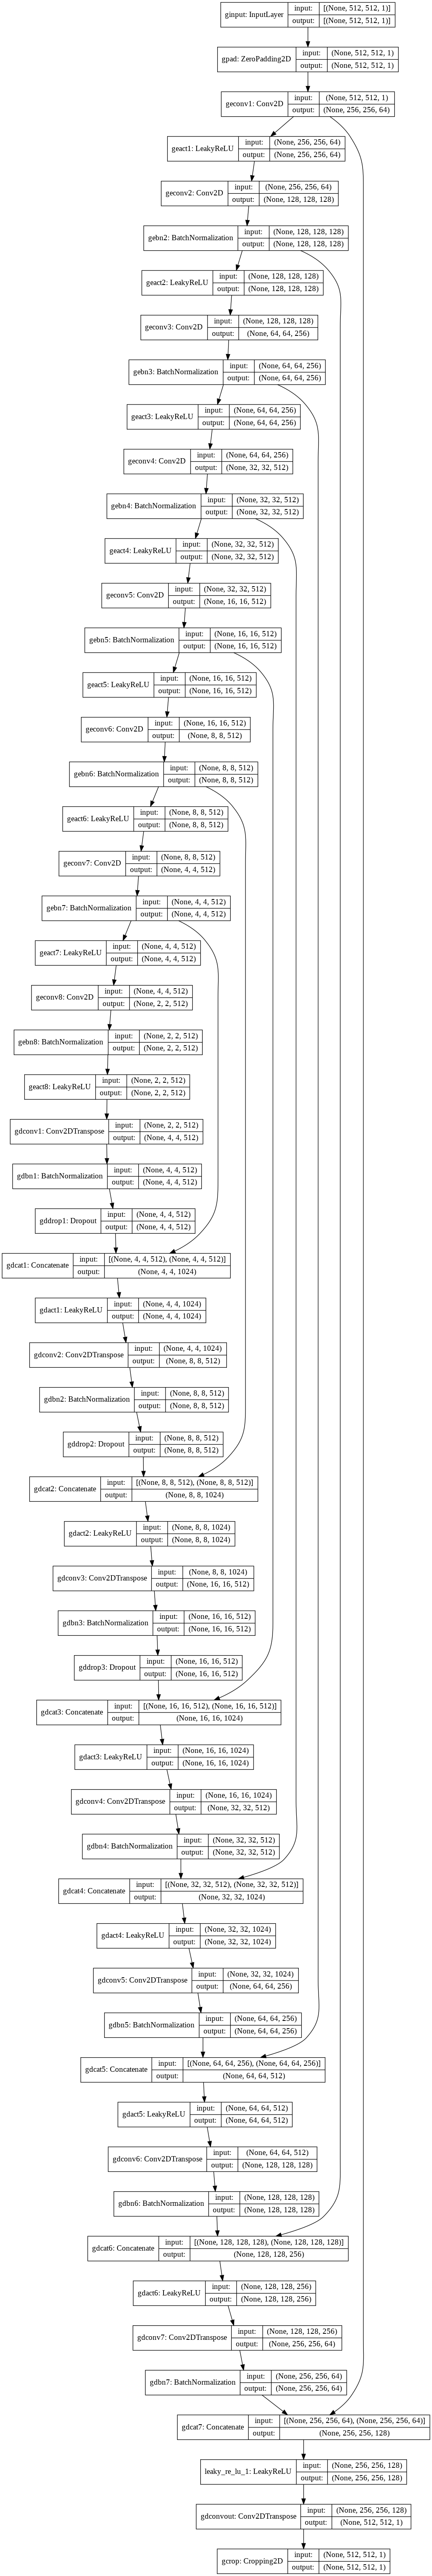

In [59]:
model_generator = make_generator_model()
# model.summary()
tf.keras.utils.plot_model(model_generator, show_shapes=True)

In [60]:
def make_discriminator_model():
    f = config.base_number_of_filters
    k = config.kernel_size
    s = config.strides
    sz = config.train_size
    c = config.channels

    inputs = tf.keras.layers.Input((sz, sz, c), name="dinput")

    d0 = tf.keras.layers.Conv2D(f, k, s, padding="same", name="dconv0")(inputs)
    d0 = tf.keras.layers.LeakyReLU(config.leak, name="dact0")(d0)
    
    d1 = tf.keras.layers.Conv2D(2*f, k, s, padding="same", name="dconv1")(d0)
    d1 = tf.keras.layers.BatchNormalization(name="dbn1")(d1)
    d1 = tf.keras.layers.LeakyReLU(config.leak, name="dact1")(d1)

    d2 = tf.keras.layers.Conv2D(4*f, k, s, padding="same", name="dconv2")(d1)
    d2 = tf.keras.layers.BatchNormalization(name="dbn2")(d2)
    d2 = tf.keras.layers.LeakyReLU(config.leak, name="dact2")(d2)

    d3 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="dconv3")(d2)
    d3 = tf.keras.layers.BatchNormalization(name="dbn3")(d3)
    d3 = tf.keras.layers.LeakyReLU(config.leak, name="dact3")(d3)

    d4 = tf.keras.layers.Flatten(name="dflatout")(d3)

    outputs = tf.keras.layers.Dense(1, name="ddenseout")(d4)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name="cond_dsc")

    return model

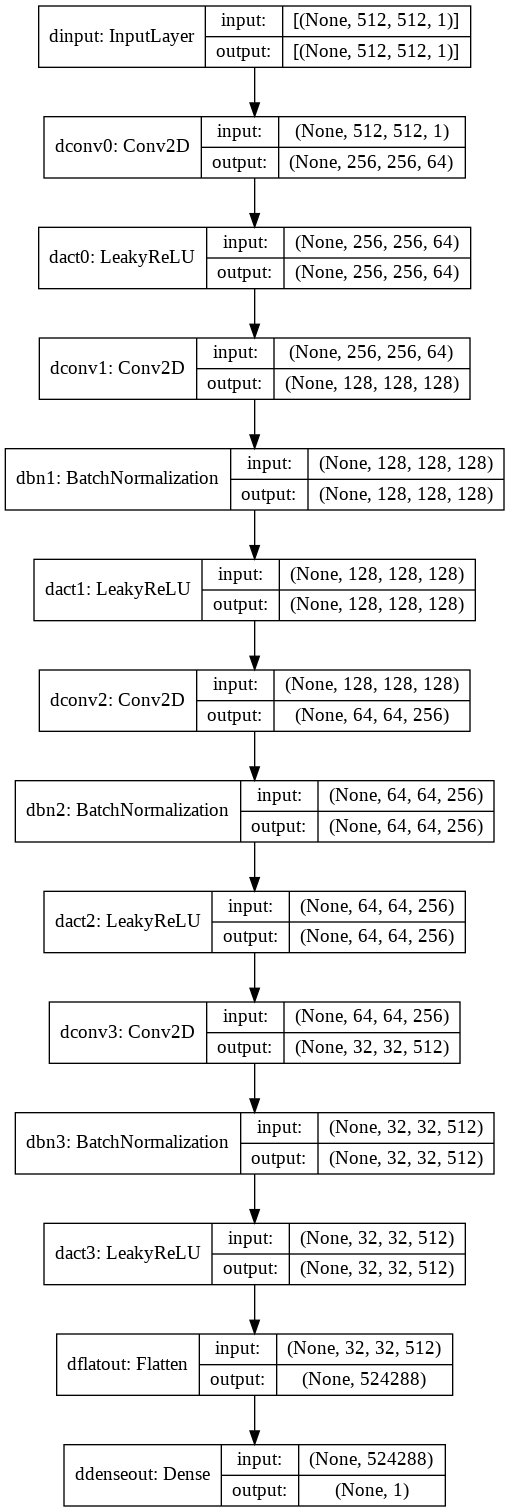

In [61]:
model_discriminator = make_discriminator_model()
tf.keras.utils.plot_model(model_discriminator, show_shapes=True)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import cv2

def generator_d_loss(generated_output):
    # [1,1,...,1] with generated images since we want the discriminator to judge them as real
    # return tf.losses.sigmoid_cross_entropy(tf.ones_like(generated_output), generated_output)
    return tf.compat.v1.losses.sigmoid_cross_entropy(tf.ones_like(generated_output), generated_output)

def generator_abs_loss(labels, generated_images):
    # As well as "fooling" the discriminator, we want particular pressure on ground-truth accuracy
    return config.L1_lambda * tf.compat.v1.losses.absolute_difference(labels, generated_images)  # mean


def discriminator_loss(real_output, generated_output):
    # [1,1,...,1] with real output since we want our generated examples to look like it
    # real_loss = tf.losses.sigmoid_cross_entropy(
    #     multi_class_labels=tf.ones_like(real_output), logits=real_output)
    real_loss = tf.compat.v1.losses.sigmoid_cross_entropy(
        multi_class_labels=tf.ones_like(real_output), logits=real_output)
    

    # [0,0,...,0] with generated images since they are fake
    # generated_loss = tf.losses.sigmoid_cross_entropy(
    #     multi_class_labels=tf.zeros_like(generated_output), logits=generated_output)
    generated_loss = tf.compat.v1.losses.sigmoid_cross_entropy(
        multi_class_labels=tf.zeros_like(generated_output), logits=generated_output)


    total_loss = real_loss + generated_loss

    return total_loss


def train_step(inputs, labels, epoch):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(inputs, training=True)

        real_output = discriminator(labels, training=True)
        generated_output = discriminator(generated_images, training=True)
            
        gen_d_loss = generator_d_loss(generated_output)
        gen_abs_loss = generator_abs_loss(labels, generated_images)
        gen_loss = gen_d_loss + gen_abs_loss
        # gen_rmse = data_processing.rmse(labels, generated_images)
        # gen_psnr = data_processing.psnr(labels, generated_images)
        gen_rmse = rmse(labels, generated_images)
        gen_psnr = psnr(labels, generated_images)
        disc_loss = discriminator_loss(real_output, generated_output)

        # Logging
        # global_step.assign_add(1)   
        log_metric(gen_d_loss, "train/loss/generator_deception", epoch)
        log_metric(gen_abs_loss, "train/loss/generator_abs_error", epoch)
        log_metric(gen_loss, "train/loss/generator", epoch)
        log_metric(disc_loss, "train/loss/discriminator", epoch)
        log_metric(gen_rmse, "train/accuracy/rmse", epoch)
        log_metric(gen_psnr, "train/accuracy/psnr", epoch)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.variables))
    

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
  
        for x, y in tf.compat.v1.data.make_one_shot_iterator(dataset):
            x = tf.image.resize(x, [512, 512],
                            method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
            y = tf.image.resize(y, [512, 512],
                            method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
            # print(x.shape)
            # print(y.shape)
            # train_step(x, y)
            train_step(x, y, epoch)

        generate_and_save_images(generator,
                                 epoch + 1,
                                 selected_inputs,
                                 selected_labels)
        
        # saving (checkpoint) the model every few epochs
        if (epoch + 1) % config.save_per_epoch == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)
        
        print ('Time taken for epoch {} is {} sec'.format(epoch + 1,
                                                          time.time()-start))
    # generating after the final epoch
    generate_and_save_images(generator,
                             epochs,
                             selected_inputs,
                             selected_labels)
    
def generate_and_save_images(model, epoch, test_inputs, test_labels):
    if model is None:
        predictions = test_inputs
    else:
        # Make sure the training parameter is set to False because we
        # don't want to train the batchnorm layer when doing inference.
        predictions = model(test_inputs, training=False)

    types = [predictions, test_labels]  # Image types (alternated in rows)
    ntype = len(types)
    nrows = 4
    ncols = 8
    fig = plt.figure(figsize=(8, 5))
    
    for i in range(ntype * predictions.shape[0]):
        plt.subplot(nrows, ncols, i+1)
        # Get relative index
        row = int(i / ncols)
        row_rel = row % ntype
        group = int(row / ntype)
        shift = ncols * (group * (ntype - 1) + row_rel)
        idx = i - shift
        # Plot
        for t in range(ntype):
            if row_rel == 0:
                j = int(i / ntype)
                rmse_val = rmse(test_labels[j], predictions[j], norm=2)
                psnr_val = psnr(test_labels[j], predictions[j], max_diff=1)
                plt.xlabel('RMSE={:.3f}\nPSNR={:.2f}'.format(rmse_val, psnr_val), fontsize=8)
            if row_rel == t:
                plt.imshow(types[row_rel][idx, :, :, 0], vmin=-1, vmax=1, cmap='gray')
                break
        plt.xticks([])
        plt.yticks([])
    
    plt.savefig(os.path.join(results_path, 'image_at_epoch_{:04d}.png'.format(epoch)))
    # plt.show()

# def log_metric(value, name):
#     with tf.summary.always_record_summaries():
#         tf.summary.scalar(name, value)
    
def log_metric(value, name, epoch):
    # with tf.summary.always_record_summaries():
    #     tf.summary.scalar(name, value)
    tf.summary.scalar(name, value,epoch)
    



In [65]:

# model_path = "out/noise_gan/model/2018-12-12-11-07-49"

# Make directories for this run
time_string = time.strftime("%Y-%m-%d-%H-%M-%S")
model_path = os.path.join(config.model_path, time_string)
results_path = os.path.join(config.results_path, time_string)
safe_makedirs(model_path)
safe_makedirs(results_path)

# Initialise logging
log_path = os.path.join('logs', config.exp_name, time_string)
summary_writer = tf.summary.create_file_writer(log_path, flush_millis=10000)
summary_writer.set_as_default()
# global_step = tf.train.get_or_create_global_step()


train_inputs = noisey


scaler = MinMaxScaler()
train_inputs = scaler.fit_transform(train_inputs)
# train_inputs = normalise(train_inputs, (-1, 1), (0, 255))

train_images = scaler.fit_transform(images)
# train_images = normalise(images, (-1, 1), (0, 255))
# train_labels = train_images.astype('float32')

train_dataset = tf.data.Dataset.from_tensor_slices((train_inputs, train_labels))\
        .shuffle(config.buffer_size).batch(config.batch_size)
    

# Test set

# test_inputs = add_gaussian_noise(test_images, stdev=0.2, data_range=(0, 255)).astype('float32')
# test_inputs = normalise(test_inputs, (-1, 1), (0, 255))
# test_images = normalise(test_images, (-1, 1), (0, 255))
# test_labels = test_images.astype('float32')
# # Set up some random (but consistent) test cases to monitor
# num_examples_to_generate = 16
# random_indices = np.random.choice(np.arange(test_inputs.shape[0]),
#                                   num_examples_to_generate,
#                                   replace=False)
# selected_inputs = test_inputs[random_indices]
# selected_labels = test_labels[random_indices]
    
# Set up the models for training
generator = make_generator_model_small()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(config.learning_rate)
discriminator_optimizer = tf.keras.optimizers.Adam(config.learning_rate)

checkpoint_prefix = os.path.join(model_path, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                     discriminator_optimizer=discriminator_optimizer,
                                     generator=generator,
                                     discriminator=discriminator)

# generate_and_save_images(None, 0, selected_inputs, selected_labels)  # baseline
print("\nTraining...\n")
# Compile training function into a callable TensorFlow graph (speeds up execution)
train_step = tf.function(train_step)
train(train_dataset, config.max_epoch)
print("\nTraining done\n")

<tf.Tensor: shape=(1000, 800, 1), dtype=float64, numpy=
array([[[-6.41267625e-02],
        [-4.89816205e-03],
        [-2.17599029e-01],
        ...,
        [ 9.91430590e+01],
        [ 1.00990590e+02],
        [ 7.43123923e+01]],

       [[ 3.59429816e-02],
        [ 2.19513152e-02],
        [ 1.87019993e-01],
        ...,
        [ 2.55084344e+02],
        [ 2.54901964e+02],
        [ 2.52309897e+02]],

       [[-7.44100342e-02],
        [ 1.89429556e-01],
        [ 1.25593534e-01],
        ...,
        [ 2.54833716e+02],
        [ 2.54938766e+02],
        [ 2.55313907e+02]],

       ...,

       [[-4.92097401e-02],
        [ 1.24426238e-01],
        [-1.43383382e-01],
        ...,
        [ 1.48816750e+01],
        [ 1.22440835e+01],
        [ 1.13775797e+01]],

       [[-2.51652127e-01],
        [ 3.02468328e-01],
        [ 1.83536604e-02],
        ...,
        [-1.38581103e-01],
        [ 3.71611247e-01],
        [-9.73487803e-02]],

       [[-3.86146985e-01],
        [ 1.2434402

In [68]:
# train_dataset.shape